### Importing Packages and Loading Files

In [16]:
import pandas as pd

In [17]:
mvps = pd.read_csv('mvps.csv')
mvps.head()

,Unnamed: 0,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,0,1,Julius Erving,30,PHI,28.0,454.0,690,0.658,82,...,8.0,4.4,2.1,1.8,0.521,0.222,0.787,13.8,0.231,1981
1,1,2,Larry Bird,24,BOS,20.0,423.0,690,0.613,82,...,10.9,5.5,2.0,0.8,0.478,0.270,0.863,10.8,0.160,1981
2,2,3,Kareem Abdul-Jabbar,33,LAL,8.0,286.0,690,0.414,80,...,10.3,3.4,0.7,2.9,0.574,0.000,0.766,14.3,0.230,1981
3,3,4,Moses Malone,25,HOU,8.0,180.0,690,0.261,80,...,14.8,1.8,1.0,1.9,0.522,0.333,0.757,13.7,0.202,1981
4,4,5,George Gervin,28,SAS,1.0,83.0,690,0.120,82,...,5.1,3.2,1.1,0.7,0.492,0.257,0.826,10.5,0.182,1981


In [18]:
players = pd.read_csv('players.csv')
players.head()

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,0,1,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,1,2,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,2,3,Mark Acres,C,28,ORL,68,0,19.3,1.6,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,3,4,Michael Adams,PG,28,DEN,66,66,35.5,8.5,...,0.9,3.0,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,4,5,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991


In [19]:
teams = pd.read_csv('teams.csv')
teams.head()

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics*
1,1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks*
3,3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets


### Cleaning MVP Votes Data

In [20]:
mvps = mvps[['Player', 'Year', 'Pts Won', 'Pts Max', 'Share']]
mvps.head()

,Player,Year,Pts Won,Pts Max,Share
0,Julius Erving,1981,454.0,690,0.658
1,Larry Bird,1981,423.0,690,0.613
2,Kareem Abdul-Jabbar,1981,286.0,690,0.414
3,Moses Malone,1981,180.0,690,0.261
4,George Gervin,1981,83.0,690,0.120


### Cleaning Player Data

In [21]:
del players['Unnamed: 0']
del players['Rk']
players.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,.474,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,15.1,.413,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,Mark Acres,C,28,ORL,68,0,19.3,1.6,3.1,.509,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,Michael Adams,PG,28,DEN,66,66,35.5,8.5,21.5,.394,...,0.9,3.0,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,11.7,.462,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991


In [22]:
# Removing * from player names
players['Player'] = players['Player'].str.replace('*', '', regex = False) 

In [23]:
# Getting single record for players played for multiple teams in one season
def single_row(df):
    if df.shape[0]==1:
        return df
    else: 
        row = df[df['Tm'] == 'TOT']  # Total Stats
        row['Tm'] = df.iloc[-1,:]['Tm']  # Replace TOT with last played team
        return row

In [24]:
players = players.reset_index()

In [25]:
type(players)

pandas.core.frame.DataFrame

In [26]:
players = players.groupby(['Player', 'Year']).apply(single_row)
players.head(20)

index         Player Pos Age   Tm   G  GS    MP  \
Player        Year                                                          
A.C. Green    1991 164      164     A.C. Green  PF  27  LAL  82  21  26.4   
              1992 633      633     A.C. Green  PF  28  LAL  82  53  35.4   
              1993 1092    1092     A.C. Green  PF  29  LAL  82  55  34.4   
              1994 1579    1579     A.C. Green  PF  30  PHO  82  55  34.5   
              1995 2067    2067     A.C. Green  SF  31  PHO  82  52  32.8   
              1996 2563    2563     A.C. Green  SF  32  PHO  82  36  25.8   
              1997 3138    3138     A.C. Green  PF  33  DAL  83  73  30.0   
              1998 3725    3725     A.C. Green  PF  34  DAL  82  68  32.3   
              1999 4283    4283     A.C. Green  PF  35  DAL  50  35  18.5   
              2000 4811    4811     A.C. Green  PF  36  LAL  82  82  23.5   
              2001 5330    5330     A.C. Green  PF  37  MIA  82   1  17.2   
A.J. Bramlett 2000 4684    4684  A.J. Bramlett   C  23  CLE   8   0   7.6   
A.J. English  1991 127      127   A.J. English  SG  23  WSB  70  12  20.6   
              1992 597      597   A.J. English  SG  24  WSB  81   6  20.6   
A.J. Guyton   2001 5333    5333    A.J. Guyton  PG  22  CHI  33   8  19.1   
              2002 5886    5886    A.J. Guyton  PG  23  CHI  45   6  13.5   
              2003 6393    6393    A.J. Guyton  PG  24  GSW   2   0   4.5   
A.J. Hammons  2017 14814  14814   A.J. Hammons   C  24  DAL  22   0   7.4   
A.J. Price    2010 10727  10727     A.J. Price  PG  23  IND  56   2  15.4   
              2011 11356  11356     A.J. Price  PG  24  IND  50   0  15.9   

                           FG   FGA  ...  ORB  DRB  TRB  AST  STL  BLK  TOV  \
Player        Year                   ...                                      
A.C. Green    1991 164    3.1   6.6  ...  2.5  3.8  6.3  0.9  0.7  0.3  1.2   
              1992 633    4.7   9.8  ...  3.7  5.6  9.3  1.4  1.1  0.4  1.4   
              1993 1092   4.6   8.6  ...  3.5  5.2  8.7  1.4  1.1  0.5  1.4   
              1994 1579   5.7  11.3  ...  3.4  5.8  9.2  1.7  0.9  0.5  1.2   
              1995 2067   3.8   7.5  ...  2.4  5.8  8.2  1.5  0.7  0.4  1.4   
              1996 2563   2.6   5.4  ...  2.0  4.7  6.8  0.9  0.5  0.3  1.0   
              1997 3138   2.8   5.8  ...  2.7  5.2  7.9  0.8  0.8  0.2  0.9   
              1998 3725   3.0   6.5  ...  2.7  5.5  8.1  1.5  1.0  0.3  0.8   
              1999 4283   2.2   5.1  ...  1.6  2.9  4.6  0.5  0.6  0.2  0.4   
              2000 4811   2.1   4.7  ...  2.0  4.0  5.9  1.0  0.6  0.2  0.6   
              2001 5330   1.8   4.0  ...  1.3  2.5  3.8  0.5  0.4  0.1  0.5   
A.J. Bramlett 2000 4684   0.5   2.6  ...  1.5  1.3  2.8  0.0  0.1  0.0  0.4   
A.J. English  1991 127    3.6   8.2  ...  0.9  1.2  2.1  2.5  0.4  0.2  1.6   
              1992 597    4.5  10.4  ...  0.9  1.2  2.1  1.8  0.4  0.1  1.1   
A.J. Guyton   2001 5333   2.4   5.8  ...  0.3  0.8  1.1  1.9  0.3  0.2  0.7   
              2002 5886   2.0   5.4  ...  0.3  0.7  1.0  1.8  0.2  0.2  0.8   
              2003 6393   0.0   2.0  ...  0.0  0.0  0.0  1.0  0.5  0.0  0.5   
A.J. Hammons  2017 14814  0.8   1.9  ...  0.4  1.3  1.6  0.2  0.0  0.6  0.5   
A.J. Price    2010 10727  2.6   6.3  ...  0.2  1.4  1.6  1.9  0.6  0.1  1.1   
              2011 11356  2.3   6.4  ...  0.3  1.1  1.4  2.2  0.6  0.0  1.1   

                           PF   PTS  Year  
Player        Year                         
A.C. Green    1991 164    1.4   9.1  1991  
              1992 633    1.7  13.6  1992  
              1993 1092   1.8  12.8  1993  
              1994 1579   1.7  14.7  1994  
              1995 2067   1.8  11.2  1995  
              1996 2563   1.7   7.5  1996  
              1997 3138   1.7   7.2  1997  
              1998 3725   1.9   7.3  1998  
              1999 4283   1.4   4.9  1999  
              2000 4811   1.5   5.0  2000  
              2001 5330   1.5   4.5  2001  
A.J. Bramlett 2000 4

In [27]:
# Dropping indexes
players.index = players.index.droplevel()
players.index = players.index.droplevel()
players.head()

,index,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
164,164,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,...,2.5,3.8,6.3,0.9,0.7,0.3,1.2,1.4,9.1,1991
633,633,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,...,3.7,5.6,9.3,1.4,1.1,0.4,1.4,1.7,13.6,1992
1092,1092,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,...,3.5,5.2,8.7,1.4,1.1,0.5,1.4,1.8,12.8,1993
1579,1579,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,...,3.4,5.8,9.2,1.7,0.9,0.5,1.2,1.7,14.7,1994
2067,2067,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,...,2.4,5.8,8.2,1.5,0.7,0.4,1.4,1.8,11.2,1995


### Combining Player and MVP Data

In [29]:
combined = players.merge(mvps, how = 'outer', on = ['Player', 'Year'])  # Outer merge since all rows in players is not in mvps 
combined.head()

,index,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,164.0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,...,0.9,0.7,0.3,1.2,1.4,9.1,1991,NaN,NaN,NaN
1,633.0,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,...,1.4,1.1,0.4,1.4,1.7,13.6,1992,NaN,NaN,NaN
2,1092.0,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,...,1.4,1.1,0.5,1.4,1.8,12.8,1993,NaN,NaN,NaN
3,1579.0,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,...,1.7,0.9,0.5,1.2,1.7,14.7,1994,NaN,NaN,NaN
4,2067.0,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,...,1.5,0.7,0.4,1.4,1.8,11.2,1995,NaN,NaN,NaN


In [30]:
# Making NaNs 0
combined[['Pts Won', 'Pts Max', 'Share']] = combined[['Pts Won', 'Pts Max', 'Share']].fillna(0)
combined.head()

,index,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,164.0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,...,0.9,0.7,0.3,1.2,1.4,9.1,1991,0.0,0.0,0.0
1,633.0,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,...,1.4,1.1,0.4,1.4,1.7,13.6,1992,0.0,0.0,0.0
2,1092.0,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,...,1.4,1.1,0.5,1.4,1.8,12.8,1993,0.0,0.0,0.0
3,1579.0,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,...,1.7,0.9,0.5,1.2,1.7,14.7,1994,0.0,0.0,0.0
4,2067.0,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,...,1.5,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0


### Cleaning the Team Data

In [31]:
teams = teams[~teams['W'].str.contains('Division')]  # Removing rows of headers from between
teams.head(30)

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics*
1,1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks*
3,3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets
5,5,24,58,.293,32.0,101.8,107.8,-5.91,1991,Miami Heat
7,7,61,21,.744,—,110.0,101.0,8.57,1991,Chicago Bulls*
8,8,50,32,.610,11.0,100.1,96.8,3.08,1991,Detroit Pistons*
9,9,48,34,.585,13.0,106.4,104.0,2.33,1991,Milwaukee Bucks*
10,10,43,39,.524,18.0,109.8,109.0,0.72,1991,Atlanta Hawks*


In [32]:
# Removing *
teams['Team'] = teams['Team'].str.replace('*','', regex = False)
teams.head()

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics
1,1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers
2,2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks
3,3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets


In [33]:
teams['Team'].unique()

array(['Boston Celtics', 'Philadelphia 76ers', 'New York Knicks',
       'Washington Bullets', 'New Jersey Nets', 'Miami Heat',
       'Chicago Bulls', 'Detroit Pistons', 'Milwaukee Bucks',
       'Atlanta Hawks', 'Indiana Pacers', 'Cleveland Cavaliers',
       'Charlotte Hornets', 'San Antonio Spurs', 'Utah Jazz',
       'Houston Rockets', 'Orlando Magic', 'Minnesota Timberwolves',
       'Dallas Mavericks', 'Denver Nuggets', 'Portland Trail Blazers',
       'Los Angeles Lakers', 'Phoenix Suns', 'Golden State Warriors',
       'Seattle SuperSonics', 'Los Angeles Clippers', 'Sacramento Kings',
       'Toronto Raptors', 'Vancouver Grizzlies', 'Washington Wizards',
       'Memphis Grizzlies', 'New Orleans Hornets', 'Charlotte Bobcats',
       'New Orleans/Oklahoma City Hornets', 'Oklahoma City Thunder',
       'Brooklyn Nets', 'New Orleans Pelicans'], dtype=object)

In [34]:
combined['Tm'].unique()

array(['LAL', 'PHO', 'DAL', 'MIA', 'CLE', 'WSB', 'CHI', 'GSW', 'IND',
       'WAS', 'MIN', 'BOS', 'HOU', 'DEN', 'ORL', 'NOH', 'TOR', 'SAC',
       'CHO', 'POR', 'DET', 'PHI', 'UTA', 'MIL', 'VAN', 'SEA', 'NJN',
       'NOK', 'LAC', 'OKC', 'ATL', 'CHA', 'MEM', 'NYK', 'NOP', 'BRK',
       'SAS', 'CHH', nan], dtype=object)

In [35]:
# Fixing team names
nicknames = {}

with open('nicknames.csv') as f:
    lines = f.readlines()
    for line in lines[1:]:
        abbrev, name = line.replace('\n', '').split(',')
        nicknames[abbrev] = name
nicknames

{'ATL': 'Atlanta Hawks',
 'BRK': 'Brooklyn Nets',
 'BKN': 'Brooklyn Nets',
 'BOS': 'Boston Celtics',
 'CHA': 'Charlotte Bobcats',
 'CHH': 'Charlotte Hornets',
 'CHO': 'Charlotte Hornets',
 'CHI': 'Chicago Bulls',
 'CLE': 'Cleveland Cavaliers',
 'DAL': 'Dallas Mavericks',
 'DEN': 'Denver Nuggets',
 'DET': 'Detroit Pistons',
 'GSW': 'Golden State Warriors',
 'HOU': 'Houston Rockets',
 'IND': 'Indiana Pacers',
 'LAC': 'Los Angeles Clippers',
 'LAL': 'Los Angeles Lakers',
 'MEM': 'Memphis Grizzlies',
 'MIA': 'Miami Heat',
 'MIL': 'Milwaukee Bucks',
 'MIN': 'Minnesota Timberwolves',
 'NJN': 'New Jersey Nets',
 'NOH': 'New Orleans Hornets',
 'NOP': 'New Orleans Pelicans',
 'NOK': 'New Orleans/Oklahoma City Hornets',
 'NYK': 'New York Knicks',
 'OKC': 'Oklahoma City Thunder',
 'ORL': 'Orlando Magic',
 'PHI': 'Philadelphia 76ers',
 'PHX': 'Phoenix Suns',
 'PHO': 'Phoenix Suns',
 'POR': 'Portland Trail Blazers',
 'SEA': 'Seattle SuperSonics',
 'SAC': 'Sacramento Kings',
 'SAS': 'San Antonio Spu

In [36]:
combined['Team'] = combined['Tm'].map(nicknames)
combined.head()

,index,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team
0,164.0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,...,0.7,0.3,1.2,1.4,9.1,1991,0.0,0.0,0.0,Los Angeles Lakers
1,633.0,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,...,1.1,0.4,1.4,1.7,13.6,1992,0.0,0.0,0.0,Los Angeles Lakers
2,1092.0,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,...,1.1,0.5,1.4,1.8,12.8,1993,0.0,0.0,0.0,Los Angeles Lakers
3,1579.0,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,...,0.9,0.5,1.2,1.7,14.7,1994,0.0,0.0,0.0,Phoenix Suns
4,2067.0,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,...,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0,Phoenix Suns


###  Combining Dataframes

In [37]:
stats = combined.merge(teams, how = 'outer', on = ['Team', 'Year'])
stats

,index,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,Share,Team,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS
0,164.0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,...,0.000,Los Angeles Lakers,10.0,58,24,.707,5.0,106.3,99.6,6.73
1,359.0,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,...,0.000,Los Angeles Lakers,10.0,58,24,.707,5.0,106.3,99.6,6.73
2,60.0,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,...,0.000,Los Angeles Lakers,10.0,58,24,.707,5.0,106.3,99.6,6.73
3,391.0,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,...,0.000,Los Angeles Lakers,10.0,58,24,.707,5.0,106.3,99.6,6.73
4,452.0,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,...,0.000,Los Angeles Lakers,10.0,58,24,.707,5.0,106.3,99.6,6.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14301,NaN,Stephen Curry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14302,NaN,Chris Paul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14303,NaN,DeMar DeRozan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14304,NaN,Kevin Durant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Cleaning Stats

In [38]:
del stats['Unnamed: 0']

In [39]:
stats.dtypes

index      float64
Player      object
Pos         object
Age         object
Tm          object
G           object
GS          object
MP          object
FG          object
FGA         object
FG%         object
3P          object
3PA         object
3P%         object
2P          object
2PA         object
2P%         object
eFG%        object
FT          object
FTA         object
FT%         object
ORB         object
DRB         object
TRB         object
AST         object
STL         object
BLK         object
TOV         object
PF          object
PTS         object
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W           object
L           object
W/L%        object
GB          object
PS/G        object
PA/G        object
SRS         object
dtype: object

In [40]:
# Converting Datatypes
stats = stats.apply(pd.to_numeric, errors = 'ignore') # Try to convert cols to numeric, incase of error, ignore
stats.dtypes

index      float64
Player      object
Pos         object
Age        float64
Tm          object
G          float64
GS         float64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W          float64
L          float64
W/L%       float64
GB          object
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [41]:
stats['GB'].unique()

array(['5.0', '14.0', '23.0', '7.0', '—', '40.0', '42.0', '18.0', '6.0',
       '24.0', '26.0', '37.0', '29.0', '21.0', '28.0', '25.0', '8.0',
       '19.0', '1.0', '13.0', '17.0', '3.0', '15.0', '9.0', '2.0', '35.0',
       '20.0', '11.0', '16.0', '41.0', '12.0', '50.0', '10.0', '30.0',
       '34.0', '4.0', '1.5', '22.0', '51.0', '36.0', '43.0', '39.0',
       '18.5', '48.0', '46.0', '10.5', '32.0', '38.0', '27.0', '33.0',
       '31.0', '21.5', '45.0', '22.5', '25.5', '3.5', '20.5', '11.5',
       '44.0', '52.0', '56.0', '2.5', '12.5', '47.0', '32.5', '4.5', nan],
      dtype=object)

In [42]:
# Removing - from GB
stats['GB'] = stats['GB'].str.replace('—', '0')

In [43]:
stats = stats.apply(pd.to_numeric, errors = 'ignore')
stats.dtypes

index      float64
Player      object
Pos         object
Age        float64
Tm          object
G          float64
GS         float64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W          float64
L          float64
W/L%       float64
GB         float64
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [44]:
stats.to_csv('player_mvp_stats.csv')

### Data Exploration

In [45]:
# Who scored most points
highest_scoring = stats[stats['G']>70].sort_values('PTS', ascending = False).head(10)
highest_scoring

,index,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
9634,16184.0,James Harden,PG,29.0,HOU,78.0,78.0,36.8,10.8,24.5,...,1010.0,0.768,Houston Rockets,53.0,29.0,0.646,0.0,113.9,109.1,4.96
1051,8018.0,Kobe Bryant,SG,27.0,LAL,80.0,80.0,41.0,12.2,27.2,...,1250.0,0.386,Los Angeles Lakers,45.0,37.0,0.549,9.0,99.4,96.9,2.53
4425,8187.0,Allen Iverson,PG,30.0,PHI,72.0,72.0,43.1,11.3,25.3,...,1250.0,0.001,Philadelphia 76ers,38.0,44.0,0.463,11.0,99.4,101.3,-2.10
9953,1140.0,Michael Jordan,SG,29.0,CHI,78.0,78.0,39.3,12.7,25.7,...,980.0,0.577,Chicago Bulls,57.0,25.0,0.695,0.0,105.2,98.9,6.19
6871,6512.0,Tracy McGrady,SG,23.0,ORL,75.0,74.0,39.4,11.1,24.2,...,1190.0,0.359,Orlando Magic,42.0,40.0,0.512,7.0,98.5,98.4,-0.39
6300,12880.0,Kevin Durant,SF,25.0,OKC,81.0,81.0,38.5,10.5,20.8,...,1250.0,0.986,Oklahoma City Thunder,59.0,23.0,0.720,0.0,106.2,99.8,6.66
6352,15177.0,Russell Westbrook,PG,28.0,OKC,81.0,81.0,34.6,10.2,24.0,...,1010.0,0.879,Oklahoma City Thunder,47.0,35.0,0.573,4.0,106.6,105.8,1.14
1065,8592.0,Kobe Bryant,SG,28.0,LAL,77.0,77.0,40.8,10.6,22.8,...,1290.0,0.404,Los Angeles Lakers,42.0,40.0,0.512,19.0,103.3,103.4,0.24
9927,212.0,Michael Jordan,SG,27.0,CHI,82.0,82.0,37.0,12.1,22.4,...,960.0,0.928,Chicago Bulls,61.0,21.0,0.744,0.0,110.0,101.0,8.57
3263,8202.0,LeBron James,SF,21.0,CLE,79.0,79.0,42.5,11.1,23.1,...,1250.0,0.550,Cleveland Cavaliers,50.0,32.0,0.610,14.0,97.6,95.4,2.17


<AxesSubplot:xlabel='Player'>

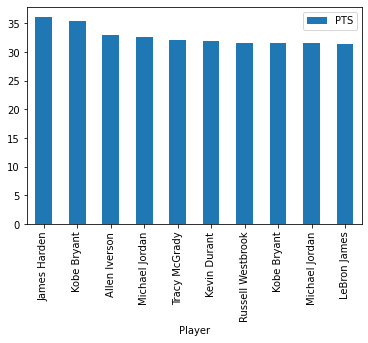

In [46]:
highest_scoring.plot.bar('Player','PTS')

In [47]:
# Who scored highest each year
highest_scoring_year = stats.groupby('Year').apply(lambda x: x.sort_values('PTS', ascending = False).head(1))

<AxesSubplot:xlabel='Year'>

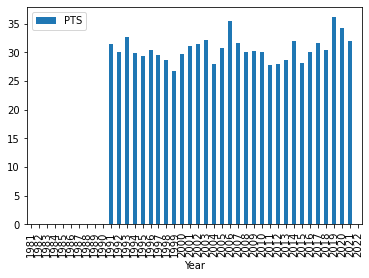

In [48]:
highest_scoring_year.plot.bar('Year', 'PTS')

In [49]:
stats.corr()['Share']

index     -0.008624
Age        0.018596
G          0.089282
GS         0.167476
MP         0.162175
FG         0.276365
FGA        0.249254
FG%        0.065789
3P         0.096225
3PA        0.096460
3P%        0.013611
2P         0.275976
2PA        0.251885
2P%        0.063240
eFG%       0.059335
FT         0.316392
FTA        0.321457
FT%        0.037875
ORB        0.101375
DRB        0.213241
TRB        0.186209
AST        0.200253
STL        0.175041
BLK        0.154713
TOV        0.233015
PF         0.071045
PTS        0.288267
Year      -0.061341
Pts Won    0.985631
Pts Max    0.513456
Share      1.000000
W          0.122718
L         -0.121866
W/L%       0.126559
GB        -0.101014
PS/G       0.045206
PA/G      -0.039617
SRS        0.122782
Name: Share, dtype: float64